# How Much of the World Has Access to the Internet?

## How Much of the World Has Access to the Internet?

Now let's now move on to the competition and challenge.

## 📖 Background
You work for a policy consulting firm. One of the firm's principals is preparing to give a presentation on the state of internet access in the world. She needs your help answering some questions about internet accessibility across the world.

## 💾 The data

#### The research team compiled the following tables ([source](https://ourworldindata.org/internet)):

#### internet
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

#### people
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

#### broadband
- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - "Internet." OurWorldInData.org._

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the top 5 countries with the highest internet use (by population share)?
2. How many people had internet access in those countries in 2019?
3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'?
4. Create a visualization for those five regions' internet usage over time.
5. What are the 5 countries with the most internet users?
6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?
7. Summarize your findings.

_Note:  [This](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) is how the World Bank defines the different regions._

### Importing the Necessary Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

pd.options.display.float_format = '{:.10f}'.format
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
sns.set_style("darkgrid")

### Reading the Data

In [2]:
# Read the internet table
internet = pd.read_csv('data/internet.csv')

internet

,Entity,Code,Year,Internet_Usage
0,Afghanistan,AFG,1990,0.0000000000
1,Afghanistan,AFG,1991,0.0000000000
2,Afghanistan,AFG,1992,0.0000000000
3,Afghanistan,AFG,1993,0.0000000000
4,Afghanistan,AFG,1994,0.0000000000
...,...,...,...,...
7084,Zimbabwe,ZWE,2013,15.5000000000
7085,Zimbabwe,ZWE,2014,16.3647399600
7086,Zimbabwe,ZWE,2015,22.7428181000
7087,Zimbabwe,ZWE,2016,23.1199890400


In [3]:
# Read the people table
people = pd.read_csv('data/people.csv')

people

,Entity,Code,Year,Users
0,Afghanistan,AFG,1990,0
1,Afghanistan,AFG,1991,0
2,Afghanistan,AFG,1992,0
3,Afghanistan,AFG,1993,0
4,Afghanistan,AFG,1994,0
...,...,...,...,...
6374,Zimbabwe,ZWE,2016,3341464
6375,Zimbabwe,ZWE,2017,3599269
6376,Zimbabwe,ZWE,2018,3763048
6377,Zimbabwe,ZWE,2019,3854006


In [4]:
#Read the broadband table
broadband = pd.read_csv('data/broadband.csv')

broadband

,Entity,Code,Year,Broadband_Subscriptions
0,Afghanistan,AFG,2004,0.0008088430
1,Afghanistan,AFG,2005,0.0008575570
2,Afghanistan,AFG,2006,0.0018915710
3,Afghanistan,AFG,2007,0.0018449820
4,Afghanistan,AFG,2008,0.0018036040
...,...,...,...,...
3883,Zimbabwe,ZWE,2016,1.2176333666
3884,Zimbabwe,ZWE,2017,1.3156938553
3885,Zimbabwe,ZWE,2018,1.4063216448
3886,Zimbabwe,ZWE,2019,1.3958175182


### Exploring the datasets:

1) For Null values.
2) For duplicated values.
3) Shape of the datasets.
4) Data types.
5) Correlation between the data.

Checking for the shape of the data

In [5]:
internet.shape

## 'Internet' dataset has 7089 rows and 4 columns

people.shape
## 'People' dataset has 6379 rows with 4 columns

broadband.shape
## 'Broadband' dataset has 3888 rows with 4 columns

(3888, 4)

Exploring the data types for the datasets

In [6]:
internet.info()
people.info()
broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          7089 non-null   object 
 1   Code            5761 non-null   object 
 2   Year            7089 non-null   int64  
 3   Internet_Usage  7089 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 221.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6379 entries, 0 to 6378
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Entity  6379 non-null   object
 1   Code    6072 non-null   object
 2   Year    6379 non-null   int64 
 3   Users   6379 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 199.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------               

Checking for Duplicated Values

In [7]:
internet.duplicated().sum()
## No duplicated values

people.duplicated().sum()
## No duplicated values

broadband.duplicated().sum()
## No duplicated values

0

Checking for null values

In [8]:
internet.isna().sum()
# 1328 null values in 'Code' 

people.isna().sum()
# 307 null values in 'Code'

broadband.isna().sum()
# 271 null values in 'Code'


Entity                       0
Code                       271
Year                         0
Broadband_Subscriptions      0
dtype: int64

### Q1. What are the top 5 countries with the highest internet use (by population share)?

To answer the question, we will be taking the data for the latest year to perform our analysis. For this case, it would be the year 2019

In [9]:
int_usage = internet.loc[internet['Year'] == 2019]
int_usage = int_usage.pivot_table(index = 'Entity', values = 'Internet_Usage', aggfunc = 'sum' )
int_usage = int_usage.sort_values('Internet_Usage', ascending = False).head().reset_index()
int_usage

,Entity,Internet_Usage
0,Bahrain,99.7015043800
1,Qatar,99.6528042100
2,Kuwait,99.5426764500
3,United Arab Emirates,99.1499979600
4,Denmark,98.0464347500


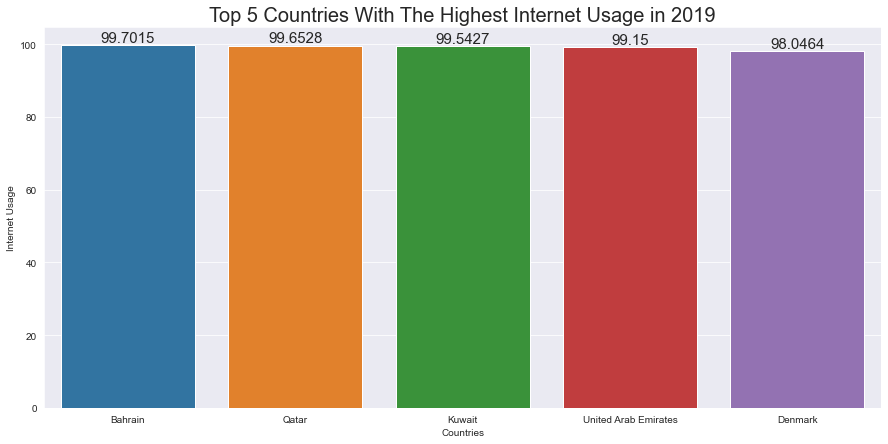

In [10]:
plt.figure(figsize = (15,7))
bar = sns.barplot(x = 'Entity', y = 'Internet_Usage', data = int_usage)
plt.title('Top 5 Countries With The Highest Internet Usage in 2019', fontsize = 20)
bar.bar_label(bar.containers[0], fontsize = 15)
plt.xlabel('Countries')
plt.ylabel('Internet Usage')
plt.show()

#### The analysis above splits the original data frame to obtain countries and their internet usages for the year 2019. The split data is then sorted by their respective countries and the total internet usage for each country is obtained.

#### From the anlysis, the top 5 countries with the highest internet usage is Bahrain, Qatar, Kuwait Countries, United Arab Emirates and Denmark respectively.

### 2. How many people had internet access in those countries in 2019?

In [11]:
countries = ['Bahrain', 'Qatar', 'Kuwait', 'United Arab Emirates', 'Denmark']
ppl = people.loc[(people['Year'] == 2019) & people['Entity'].isin(countries)]
ppl = ppl.pivot_table(index = 'Entity', values = 'Users', aggfunc = 'sum')
ppl = ppl.sort_values('Users', ascending = False).head().reset_index()
ppl

,Entity,Users
0,United Arab Emirates,9133361
1,Denmark,5682653
2,Kuwait,4420795
3,Qatar,2797495
4,Bahrain,1489735


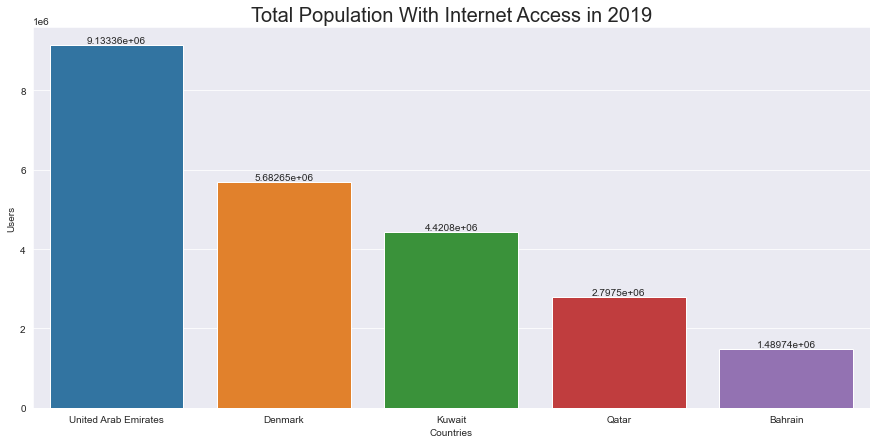

Total amount of people with internet access for the year 2019 is: 23524039


In [12]:
plt.figure(figsize = (15,7))
bar1 = sns.barplot(x = 'Entity', y = 'Users', data = ppl)
plt.title('Total Population With Internet Access in 2019', fontsize = 20)
bar1.bar_label(bar1.containers[0])
plt.xlabel('Countries')
plt.ylabel('Users')
plt.show()

print(f'Total amount of people with internet access for the year 2019 is:', ppl['Users'].sum())

#### For this analysis, internet usage is explored for the top 5 countries with internet usage. The data is once again extracted to only contain the targetted countries only for the year 2019. The data is then grouped by the respective countries to obtain the total users for the country.

#### From the analysis performed, total population with internet access for the targetted countries amount to 23524039, with United Arab Emirates having the highest number of 9133361.

### Q3. What are the top 5 countries with the highest internet use for each of the following regions:  'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'Europe & Central Asia'? Create visualizations for each of the regions to show internet usage over time as well.

Utilzing the Country codes provided in https://statisticstimes.com/geography/countries-by-continents.php, we can group the countries by their respective country codes to obtain their regions

In [13]:
codes = pd.read_html('https://statisticstimes.com/geography/countries-by-continents.php', thousands=None, decimal=',')
table = codes[2]
table = table.rename(columns = {'ISO-alpha3 Code': 'Code'})
table

,No,Country or Area,Code,M49 Code,Region 1,Region 2,Continent
0,1,Afghanistan,AFG,4,Southern Asia,NaN,Asia
1,2,Åland Islands,ALA,248,Northern Europe,NaN,Europe
2,3,Albania,ALB,8,Southern Europe,NaN,Europe
3,4,Algeria,DZA,12,Northern Africa,NaN,Africa
4,5,American Samoa,ASM,16,Polynesia,NaN,Oceania
...,...,...,...,...,...,...,...
244,245,Wallis and Futuna Islands,WLF,876,Polynesia,NaN,Oceania
245,246,Western Sahara,ESH,732,Northern Africa,NaN,Africa
246,247,Yemen,YEM,887,Western Asia,NaN,Asia
247,248,Zambia,ZMB,894,Eastern Africa,Sub-Saharan Africa,Africa


In [14]:
## Just to make sure that there are no duplicated Codes in the data frame itself.
table['Code'].duplicated().sum()

0

In [15]:
merge = pd.merge(internet, table, left_on = 'Code', right_on = 'Code', how = 'outer' )
merge.loc[merge['Region 1'] == 'Southern Asia']

,Entity,Code,Year,Internet_Usage,No,Country or Area,M49 Code,Region 1,Region 2,Continent
0,Afghanistan,AFG,1990.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
1,Afghanistan,AFG,1991.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
2,Afghanistan,AFG,1992.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
3,Afghanistan,AFG,1993.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
4,Afghanistan,AFG,1994.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...
6218,Sri Lanka,LKA,2013.0000000000,21.9000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6219,Sri Lanka,LKA,2014.0000000000,25.8000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6220,Sri Lanka,LKA,2015.0000000000,12.1000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6221,Sri Lanka,LKA,2016.0000000000,16.4000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia


### Middle East and Northern Africa

In [16]:
### Utilizing information from the web to determine Middle Eastern and North African Countries to extract data from our tables.

middle_east = pd.read_html('https://en.wikipedia.org/wiki/Middle_East', thousands = None, decimal = ',')
ME_table = middle_east[1]
ME_table['Country'].unique()

Middle_East = ['Akrotiri and Dhekelia', 'Bahrain', 'Cyprus', 'Egypt', 'Iran',
       'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman',
       'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey',
       'United Arab Emirates', 'Yemen']
Northern_Africa = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia',
       'Western Sahara']

Mid_East_North_Africa = Middle_East + Northern_Africa
Mid_East_North_Africa

['Akrotiri and Dhekelia',
 'Bahrain',
 'Cyprus',
 'Egypt',
 'Iran',
 'Iraq',
 'Israel',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Oman',
 'Palestine',
 'Qatar',
 'Saudi Arabia',
 'Syria',
 'Turkey',
 'United Arab Emirates',
 'Yemen',
 'Algeria',
 'Egypt',
 'Libya',
 'Morocco',
 'Sudan',
 'Tunisia',
 'Western Sahara']

In [17]:
merge

,Entity,Code,Year,Internet_Usage,No,Country or Area,M49 Code,Region 1,Region 2,Continent
0,Afghanistan,AFG,1990.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
1,Afghanistan,AFG,1991.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
2,Afghanistan,AFG,1992.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
3,Afghanistan,AFG,1993.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
4,Afghanistan,AFG,1994.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...
7120,NaN,SJM,NaN,NaN,216.0000000000,Svalbard and Jan Mayen Islands,744.0000000000,Northern Europe,NaN,Europe
7121,NaN,TKL,NaN,NaN,224.0000000000,Tokelau,772.0000000000,Polynesia,NaN,Oceania
7122,NaN,UMI,NaN,NaN,237.0000000000,United States Minor Outlying Islands,581.0000000000,Micronesia,NaN,Oceania
7123,NaN,WLF,NaN,NaN,245.0000000000,Wallis and Futuna Islands,876.0000000000,Polynesia,NaN,Oceania


In [18]:
North_Africa = merge.loc[merge['Entity'].isin(Mid_East_North_Africa)]
North_Africa
NA = North_Africa.pivot_table(index = ['Entity', 'Year'], values = 'Internet_Usage', aggfunc = 'sum').sort_values('Internet_Usage', ascending = False).reset_index()
NA

,Entity,Year,Internet_Usage
0,Bahrain,2019.0000000000,99.7015043800
1,Qatar,2018.0000000000,99.6528491300
2,Qatar,2019.0000000000,99.6528042100
3,Kuwait,2018.0000000000,99.5988495900
4,Kuwait,2019.0000000000,99.5426764500
...,...,...,...
623,Qatar,1990.0000000000,0.0000000000
624,Qatar,1991.0000000000,0.0000000000
625,Qatar,1992.0000000000,0.0000000000
626,Qatar,1993.0000000000,0.0000000000


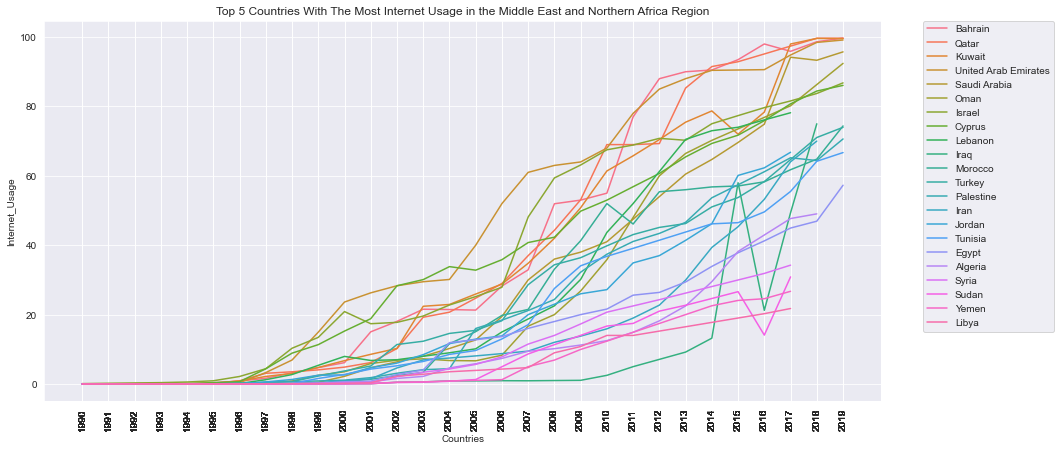

In [19]:
plt.figure(figsize=(15,7))
line = sns.lineplot(x = 'Year', y = 'Internet_Usage', hue = 'Entity' ,data = NA)
# bar = sns.barplot(x = 'Year', y = 'Internet_Usage',data = NA,hue = 'Entity' )
plt.title('Top 5 Countries With The Most Internet Usage in the Middle East and Northern Africa Region')
plt.xticks(NA['Year'], rotation = 90)
plt.xlabel('Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### For this analysis, a trend chart is plotted to get a better understanding of the data. From the trend chart, it is observed that data was not present for most of the countries after the year 2017. For consistency, we will be using the data from 2017 only for a more accurate representation of internet usage in both the regions.

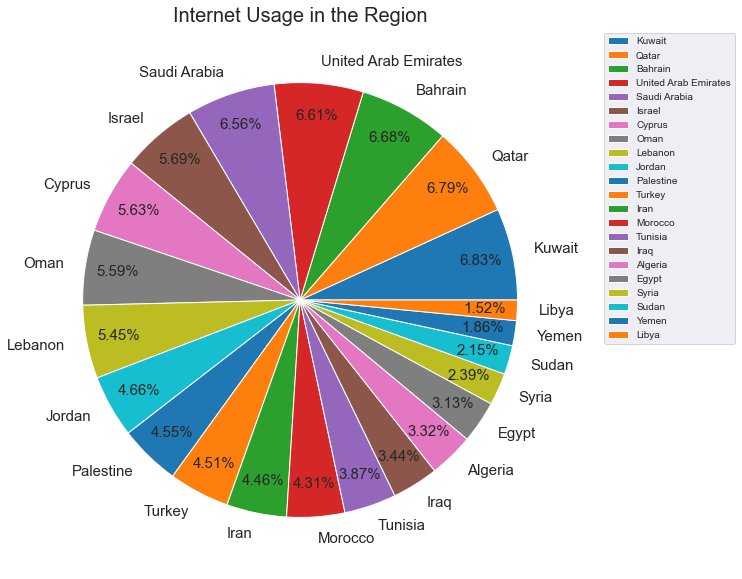

In [20]:
NA_2017 = NA.loc[NA['Year'] == 2017]

plt.figure(figsize = (15,10))
plt.pie(NA_2017['Internet_Usage'], labels = NA_2017['Entity'],autopct='%1.2f%%', pctdistance=0.85, textprops={'fontsize': 15})
plt.title('Internet Usage in the Region', fontsize = 20)
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor = [1.05,1.0])
plt.show()

#### From the plot above, the top 5 countries with the highest Internet Usage is Kuwait, Qatar, Bahriam, UAE and Saudi Arabia for the Middle East and Northern Africa Regions

### Latin America and Caribbean

In [21]:
LA_Car = ['Latin America', 'Caribbean']
car_region = merge.loc[merge['Region 1'].isin(LA_Car)]
car = car_region.pivot_table(index = ['Year','Entity'], values = 'Internet_Usage', aggfunc = 'median').reset_index()
car = car.sort_values('Internet_Usage', ascending = False)
car


,Year,Entity,Internet_Usage
462,2017.0000000000,Aruba,97.1700000000
445,2016.0000000000,Aruba,93.5424538700
429,2015.0000000000,Aruba,88.6612269300
463,2017.0000000000,Bahamas,85.0000000000
413,2014.0000000000,Aruba,83.7800000000
...,...,...,...
54,1992.0000000000,Trinidad and Tobago,0.0000000000
55,1992.0000000000,Turks and Caicos Islands,0.0000000000
56,1992.0000000000,United States Virgin Islands,0.0000000000
57,1993.0000000000,Antigua and Barbuda,0.0000000000


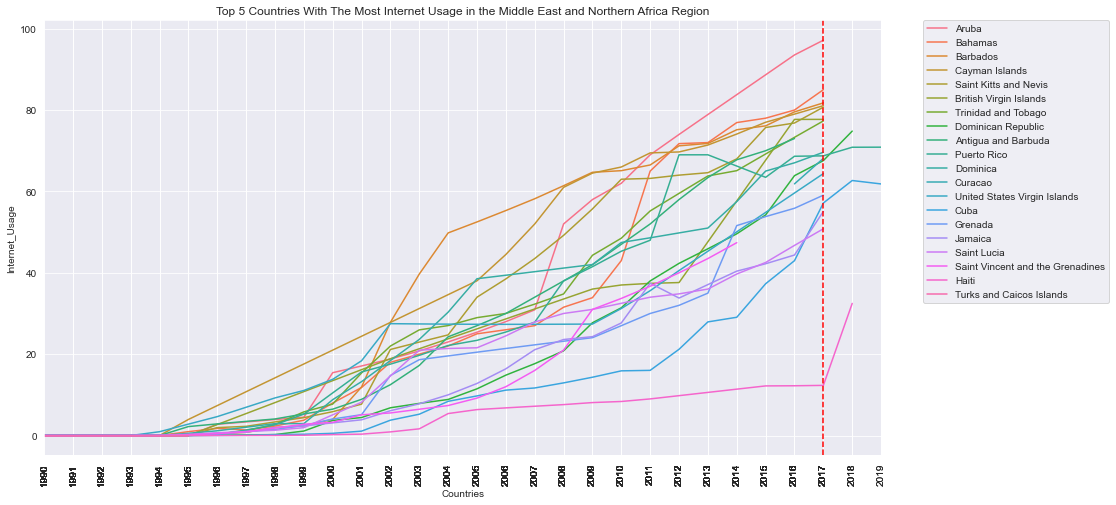

In [22]:
plt.figure(figsize = (15,8))
line = sns.lineplot(x = 'Year', y = 'Internet_Usage', hue = 'Entity' ,data = car)
plt.title('Top 5 Countries With The Most Internet Usage in the Middle East and Northern Africa Region')
line.set_xlim(NA['Year'].min(), NA['Year'].max())
plt.axvline(2017, linestyle = '--', color = 'red')
plt.xlabel('Countries')
plt.xticks(car['Year'], rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#### From the trend chart observed, data for majority of the countries in the regions are present at the year 2017. Hence, for consistency, we will be using the data from 2017 to represent internet usage for the Latin America and Carribean Regions.

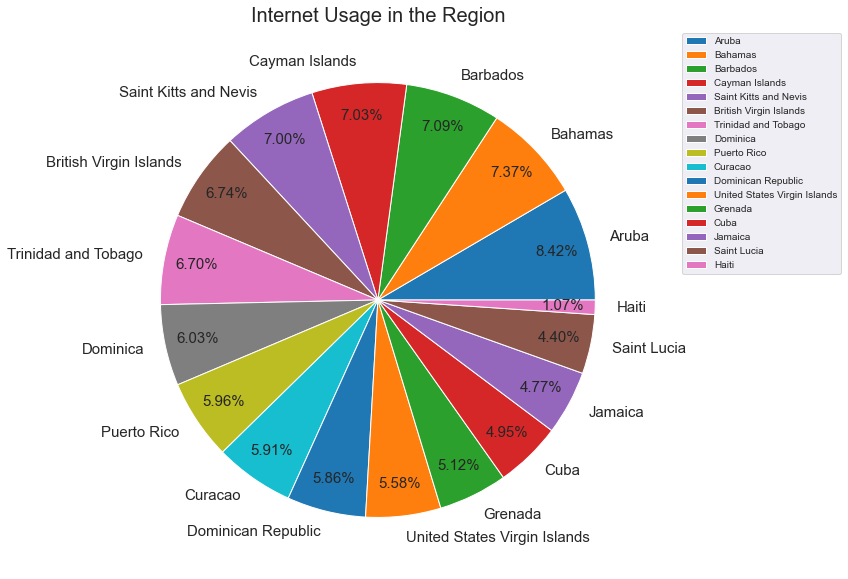

In [23]:
car_2017 = car.loc[car['Year'] == 2017]

plt.figure(figsize = (15,10))
plt.pie(car_2017['Internet_Usage'], labels = car_2017['Entity'],autopct='%1.2f%%', pctdistance=0.850, textprops={'fontsize': 15})
plt.title('Internet Usage in the Region', fontsize = 20)
plt.legend(bbox_to_anchor = [1.05,1.0])
plt.show()

#### It is observed the top 5 countries with the highest internet usage in the Latin America and Caribbean Regions are Aruba, Bahamas, Barbados , Cayman Islands and Saint Kitts and Nevis.

### East Asia & Pacific

In [24]:
merge['Region 1'].fillna('None', inplace = True)
merge['Continent'].fillna('None', inplace = True)
merge['Entity'].fillna('None', inplace = True)
East_Asia = merge.loc[(merge['Region 1'] == 'Eastern Asia') | (merge['Continent'] == 'Oceania')]
East_Asia.describe()

,Year,Internet_Usage,No,M49 Code
count,627.0000000000,627.0000000000,637.0000000000,637.0000000000
mean,2003.3237639553,21.8207343163,131.3689167975,439.4442700157
std,8.4036805337,28.4231793132,64.1759607484,212.8379121353
min,1990.0000000000,0.0000000000,5.0000000000,16.0000000000
25%,1996.0000000000,0.1066654375,79.0000000000,296.0000000000
50%,2003.0000000000,6.2515889460,145.0000000000,446.0000000000
75%,2011.0000000000,37.8500000000,180.0000000000,583.0000000000
max,2019.0000000000,96.1575826500,245.0000000000,882.0000000000


C:\Users\gibso\AppData\Local\Temp\ipykernel_4108\3831742794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  East_Asia['Year'].fillna(2003, inplace = True)


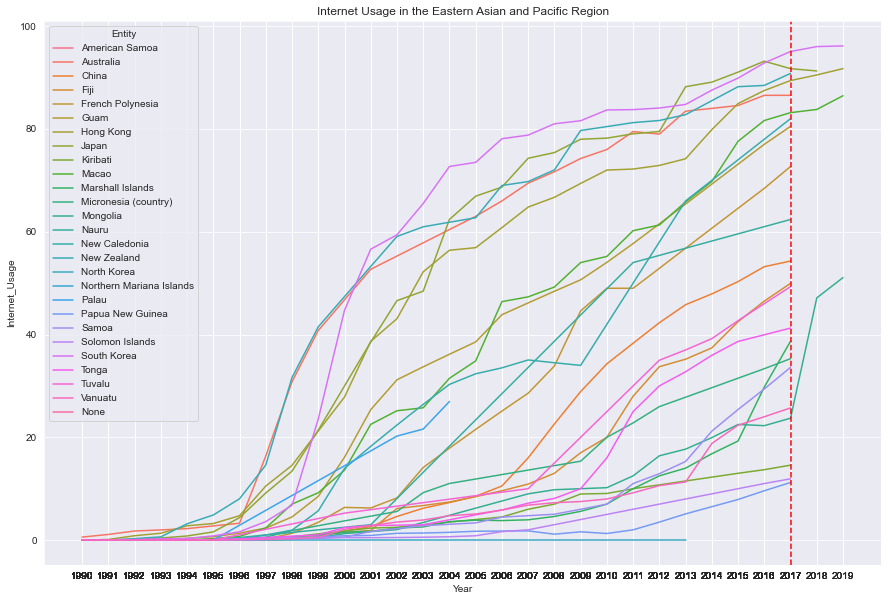

In [25]:
# Year field contains NA values for some of the regions, so we fill the NAN values with the mean (2003).
East_Asia['Year'].fillna(2003, inplace = True)

plt.figure(figsize = (15,10))
line = sns.lineplot(x = "Year", y = 'Internet_Usage', hue = 'Entity', data = East_Asia)
# line.set_xlim(East_Asia['Year'].min(), East_Asia['Year'].max())
plt.axvline(2017, linestyle = '--', color = 'red')
plt.xticks(East_Asia['Year'])
plt.title('Internet Usage in the Eastern Asian and Pacific Region')
plt.show()

### Once again, it is observed majority of data is present for the year 2017. Hence, data for 2017 will be use to determine the highest internet usage for the Eastern Asia and Pacific Region

In [26]:
East_Asia_2017 = East_Asia.loc[East_Asia['Year'] == 2017]
East_Asia_2017 = East_Asia_2017.sort_values('Internet_Usage', ascending = False)
East_Asia_2017.pivot_table(index = 'Entity', values = 'Internet_Usage', aggfunc = 'sum').sort_values('Internet_Usage', ascending = False).head().reset_index()

,Entity,Internet_Usage
0,South Korea,95.0694218800
1,Japan,91.7265472400
2,New Zealand,90.8110930700
3,Hong Kong,89.4159446500
4,Australia,86.5450488500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


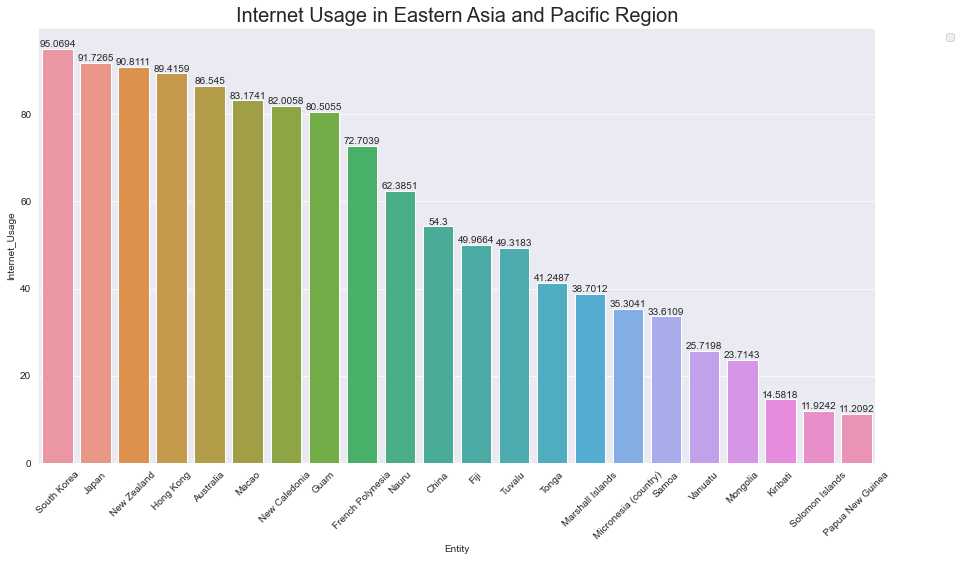

In [27]:
# sns.set_palette('seismic')
plt.figure(figsize = (15,8))
# plt.pie(East_Asia_2017['Internet_Usage'], labels = East_Asia_2017['Entity'], autopct='%1.2f%%', pctdistance=0.850, textprops={'fontsize': 15})
bar = sns.barplot(x = 'Entity', y = 'Internet_Usage', data = East_Asia_2017 )
bar.bar_label(bar.containers[0])
plt.legend(bbox_to_anchor = [1.10,1.0])
plt.title('Internet Usage in Eastern Asia and Pacific Region', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

#### It is observed the top 5 countries with the highest internet usage in the Eastern Asia and Pacific Regions are South Korea, Japan, New Zealand, Hong Kong and Australia

### South Asia

In [28]:
south_asia = merge.loc[merge['Region 1'].str.contains('Southern Asia')]
south_asia

,Entity,Code,Year,Internet_Usage,No,Country or Area,M49 Code,Region 1,Region 2,Continent
0,Afghanistan,AFG,1990.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
1,Afghanistan,AFG,1991.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
2,Afghanistan,AFG,1992.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
3,Afghanistan,AFG,1993.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
4,Afghanistan,AFG,1994.0000000000,0.0000000000,1.0000000000,Afghanistan,4.0000000000,Southern Asia,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...
6218,Sri Lanka,LKA,2013.0000000000,21.9000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6219,Sri Lanka,LKA,2014.0000000000,25.8000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6220,Sri Lanka,LKA,2015.0000000000,12.1000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia
6221,Sri Lanka,LKA,2016.0000000000,16.4000000000,212.0000000000,Sri Lanka,144.0000000000,Southern Asia,NaN,Asia


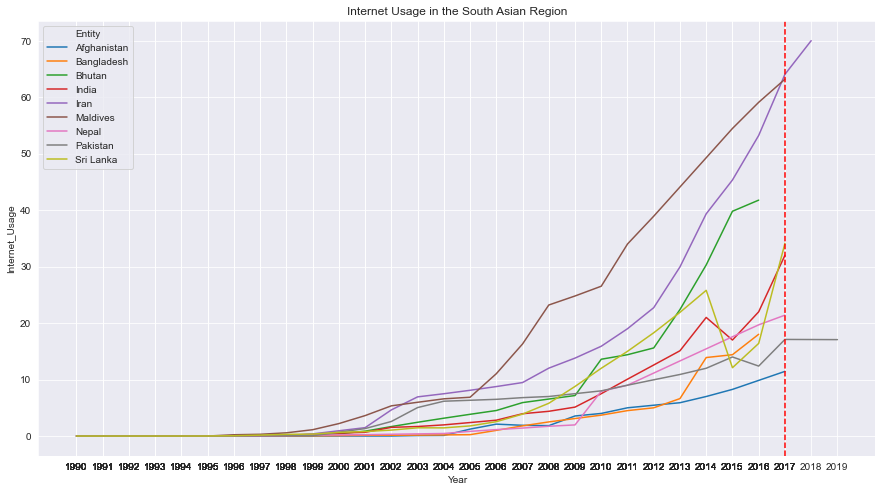

In [29]:
plt.figure(figsize = (15,8))
x = 2017
sns.lineplot(x = 'Year', y = 'Internet_Usage',hue = 'Entity', data = south_asia)
plt.axvline(x, linestyle = '--', color = 'red')
plt.title('Internet Usage in the South Asian Region')
plt.xticks(south_asia['Year'])
plt.show()

In [30]:
south_asia_2017 = south_asia.loc[south_asia['Year'] == 2017].sort_values('Internet_Usage', ascending = False)
south_asia_2017.pivot_table(index = 'Entity', values = 'Internet_Usage', aggfunc = 'sum').sort_values('Internet_Usage', ascending = False)

,Internet_Usage
Entity,
Iran,64.0439736200
Maldives,63.1856658800
Sri Lanka,34.1133479000
India,32.0000000000
Nepal,21.4035104300
Pakistan,17.1051458600
Afghanistan,11.4476880900


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


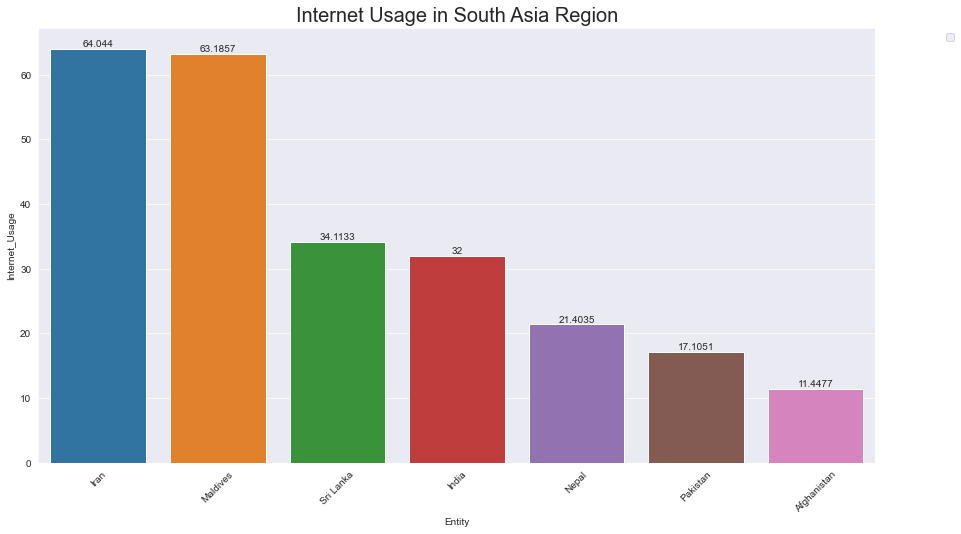

In [31]:
plt.figure(figsize = (15,8))

sns.barplot(x = 'Entity', y = 'Internet_Usage', data = south_asia_2017)
bar = sns.barplot(x = 'Entity', y = 'Internet_Usage', data = south_asia_2017 )
bar.bar_label(bar.containers[0])
plt.legend(bbox_to_anchor = [1.10,1.0])
plt.title('Internet Usage in South Asia Region', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()
plt.show()

#### Top 5 countries with the highest internet usage in the South Asia region is Iran, Maldives, Sri Lanka, India and Nepal.

### North America

In [32]:
North_America = merge.loc[merge['Region 1'].str.contains('Northern America')]
North_America.describe()
## Filling the NaN values with the mean of the dataset (2003)
North_America['Year'].fillna(2003, inplace = True)
North_America.head()

C:\Users\gibso\AppData\Local\Temp\ipykernel_4108\2712591861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  North_America['Year'].fillna(2003, inplace = True)


,Entity,Code,Year,Internet_Usage,No,Country or Area,M49 Code,Region 1,Region 2,Continent
1881,Bermuda,BMU,1990.0000000000,0.0000000000,25.0000000000,Bermuda,60.0000000000,Northern America,NaN,North America
1882,Bermuda,BMU,1991.0000000000,0.0000000000,25.0000000000,Bermuda,60.0000000000,Northern America,NaN,North America
1883,Bermuda,BMU,1992.0000000000,0.0000000000,25.0000000000,Bermuda,60.0000000000,Northern America,NaN,North America
1884,Bermuda,BMU,1993.0000000000,0.0000000000,25.0000000000,Bermuda,60.0000000000,Northern America,NaN,North America
1885,Bermuda,BMU,1994.0000000000,0.0000000000,25.0000000000,Bermuda,60.0000000000,Northern America,NaN,North America


<Figure size 432x288 with 0 Axes>

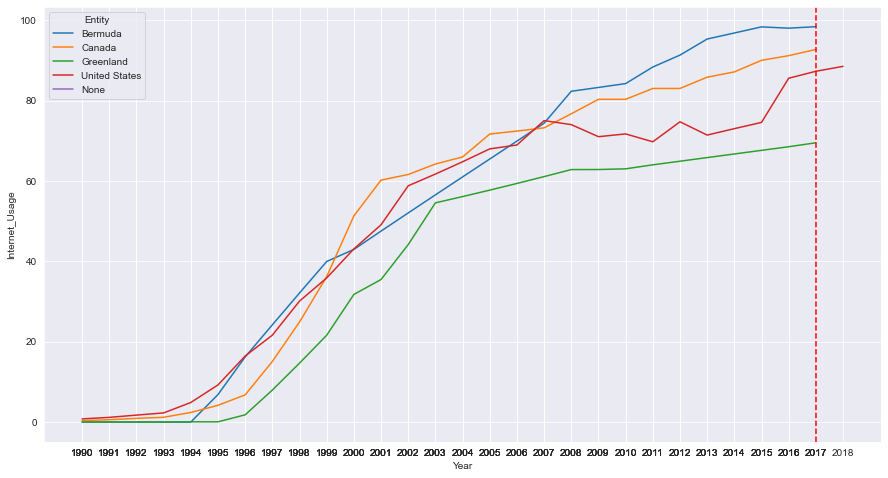

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Year', y = 'Internet_Usage', hue = 'Entity' ,data = North_America)
plt.axvline(2017, linestyle = '--', color = 'red')
plt.xticks(North_America['Year'])
plt.figure()

#### Once again, data from the year 2017 is used as it contains the internet information for most of the countries in the region

In [34]:
North_America_2017 = North_America.loc[North_America['Year'] == 2017]
North_America_2017.pivot_table(index = 'Entity', values = 'Internet_Usage', aggfunc = 'sum').reset_index()

,Entity,Internet_Usage
0,Bermuda,98.3700000000
1,Canada,92.7013719100
2,Greenland,69.4824617800
3,United States,87.2748891700


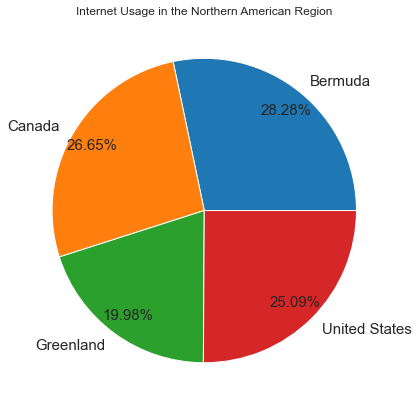

In [35]:
plt.figure(figsize  = (15,7))
plt.pie(North_America_2017['Internet_Usage'], labels = North_America_2017['Entity'],autopct='%1.2f%%', pctdistance=0.850, textprops={'fontsize': 15})
plt.title('Internet Usage in the Northern American Region')
plt.show()

####  The countries with the top internet usages are Bermuda, Canada, United States and Greenland.

### Europe and Central Asia

In [36]:
# merge.loc[merge['Region 1'].str.contains('Central Asia')]
EU_CA = merge.loc[(merge['Continent'].str.contains('Europe')) | (merge['Region 1'].str.contains('Central Asia'))]
EU_CA.describe()

# FIlling up NaN values in the 'Year' Field with the mean (2004)
EU_CA['Year'].fillna(2004, inplace = True)
EU_CA.head()

C:\Users\gibso\AppData\Local\Temp\ipykernel_4108\1635078611.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_CA['Year'].fillna(2004, inplace = True)


,Entity,Code,Year,Internet_Usage,No,Country or Area,M49 Code,Region 1,Region 2,Continent
22,Africa Eastern and Southern,NaN,1990.0000000000,0.0000000000,196.0000000000,Sark,680.0000000000,Northern Europe,Channel Islands,Europe
23,Africa Eastern and Southern,NaN,1991.0000000000,0.0015987651,196.0000000000,Sark,680.0000000000,Northern Europe,Channel Islands,Europe
24,Africa Eastern and Southern,NaN,1992.0000000000,0.0046643105,196.0000000000,Sark,680.0000000000,Northern Europe,Channel Islands,Europe
25,Africa Eastern and Southern,NaN,1993.0000000000,0.0136089801,196.0000000000,Sark,680.0000000000,Northern Europe,Channel Islands,Europe
26,Africa Eastern and Southern,NaN,1994.0000000000,0.0296583472,196.0000000000,Sark,680.0000000000,Northern Europe,Channel Islands,Europe


<Figure size 432x288 with 0 Axes>

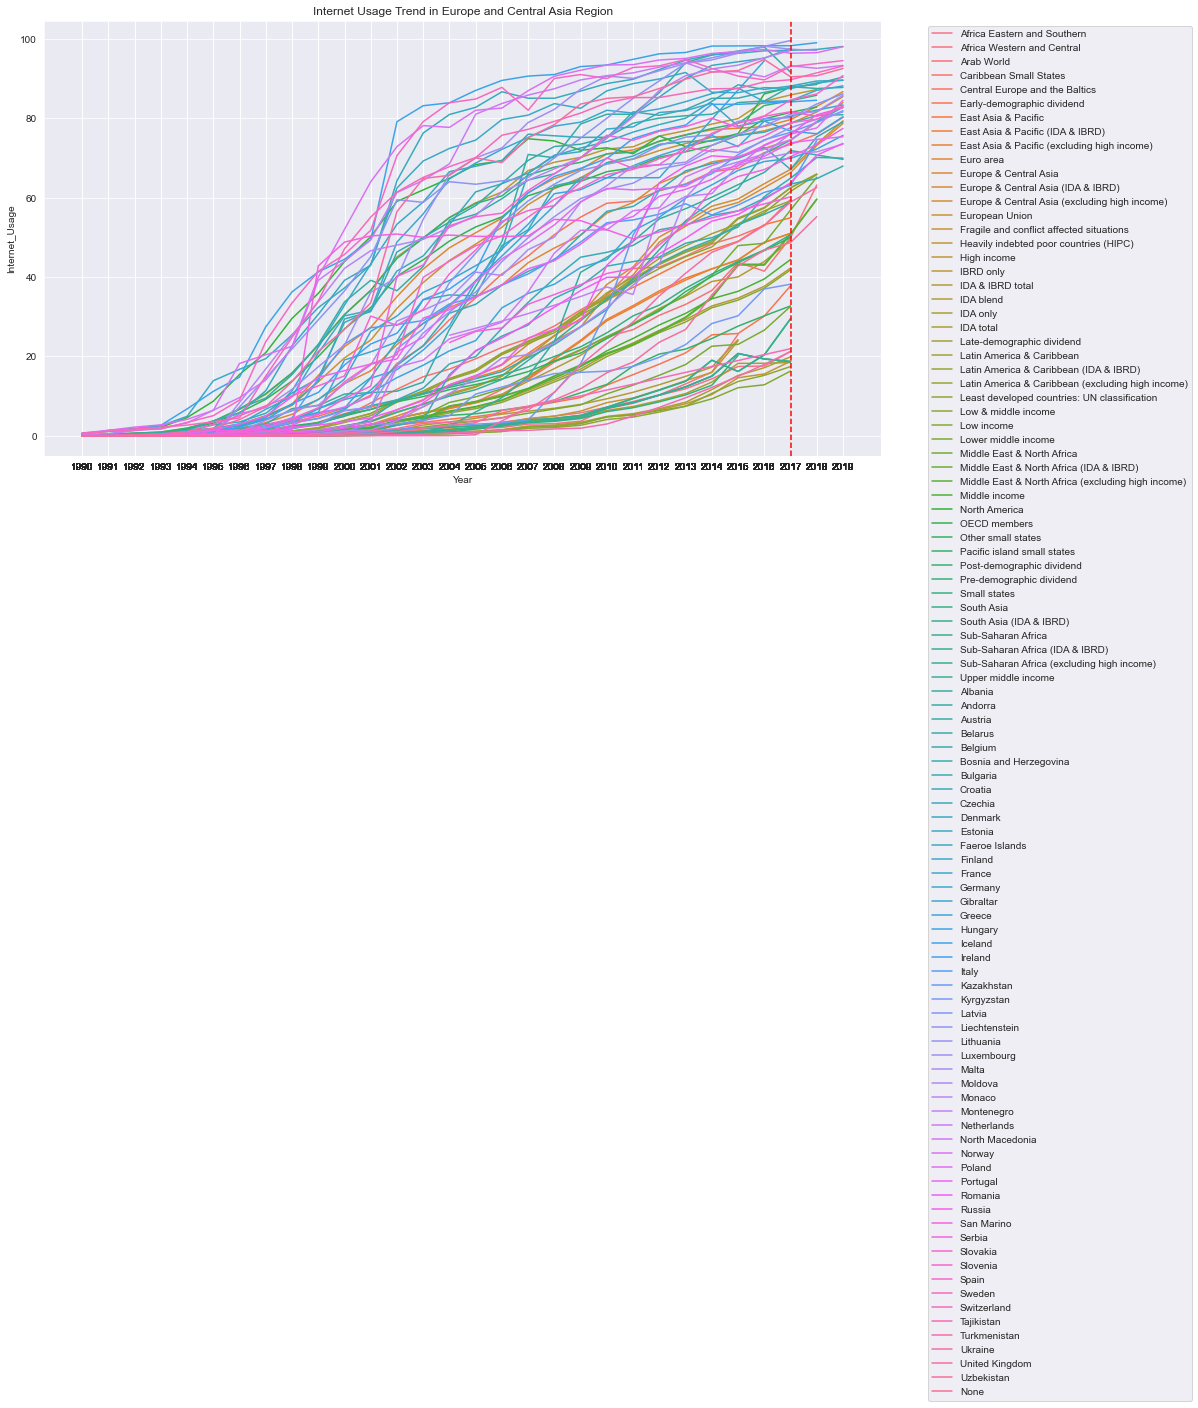

<Figure size 432x288 with 0 Axes>

In [37]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Year', y = 'Internet_Usage', hue = 'Entity' ,data = EU_CA)
plt.axvline(2017, linestyle = '--', color = 'red')
plt.title('Internet Usage Trend in Europe and Central Asia Region')
plt.legend(bbox_to_anchor = [1.05, 1.0])
plt.xticks(EU_CA['Year'])
plt.figure()

In [38]:
EU_CA_2017 = EU_CA.loc[EU_CA['Year'] == 2017].sort_values('Internet_Usage', ascending = False)
EU_CA_2017.pivot_table(index = 'Entity', values = 'Internet_Usage', aggfunc = 'sum').sort_values('Internet_Usage', ascending = False).head()

,Internet_Usage
Entity,
Liechtenstein,99.5466124500
Iceland,98.2552011900
Faeroe Islands,97.5819589400
Luxembourg,97.3629603200
Denmark,97.0993621600


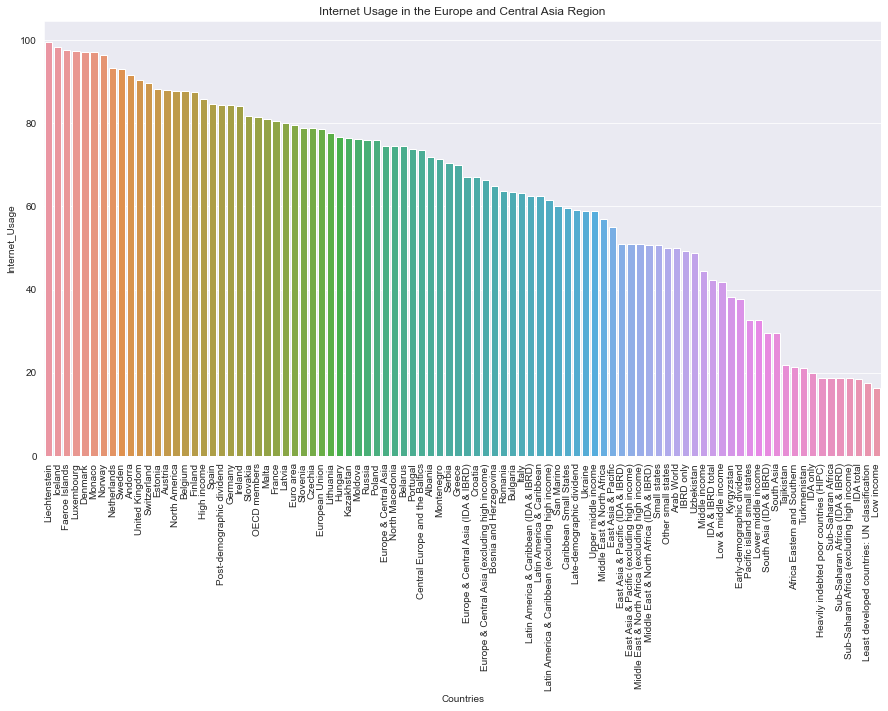

In [39]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'Entity', y = 'Internet_Usage', data = EU_CA_2017)
plt.title('Internet Usage in the Europe and Central Asia Region')
plt.xlabel('Countries')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

#### Liechtenstein, Iceland, Faeroe Islands, Luxembourg and Denmark are the top 5 countries with the highest Internet Usage in the Europe and Central Asia Regions.

### Q4: What are the 5 countries with the most internet users?

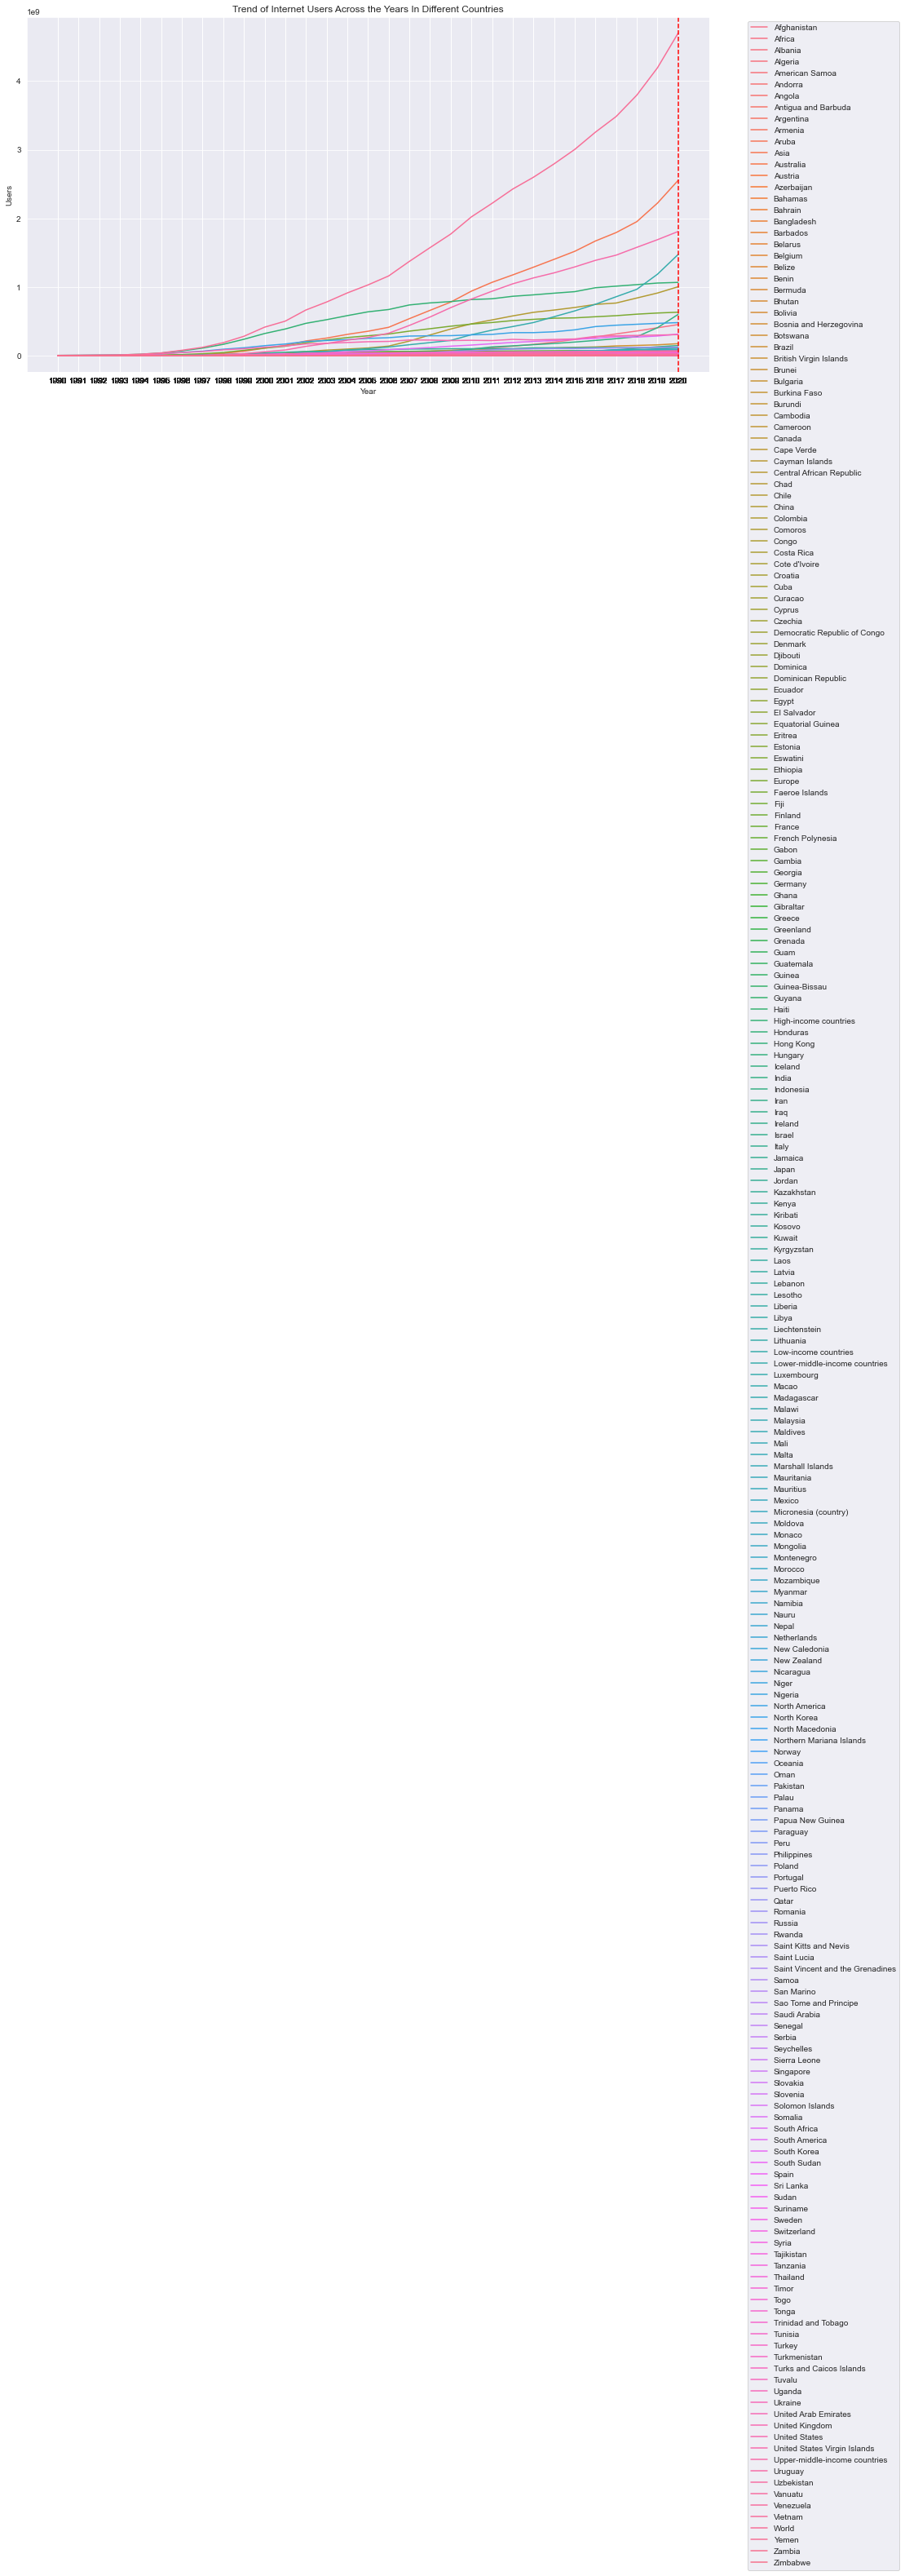

In [40]:
## Plotting a trend chart to get a better understanding of the data for internet users in each country.
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Year', y = 'Users', hue = 'Entity', data = people)
plt.title('Trend of Internet Users Across the Years In Different Countries')
plt.legend(bbox_to_anchor = [1.05,1.0])
plt.axvline(2020, linestyle = '--', color = 'red')
plt.xticks(people['Year'])
plt.show()

#### The Year 2020 contains the most complete data points for internet users in different countries. To determine the countries with the most internet users, We will be using the data from year 2020 for the analysis.

In [41]:
users_2020 = people.loc[(people['Year'] == 2020) & (people['Code'].notna()) & (people['Entity'] != 'World')]
users_2020 = users_2020.sort_values('Users', ascending = False).head()
users_2020

,Entity,Code,Year,Users
1231,China,CHN,2020,1003218650
2699,India,IND,2020,600446441
6049,United States,USA,2020,305371298
834,Brazil,BRA,2020,173419624
2730,Indonesia,IDN,2020,146059763


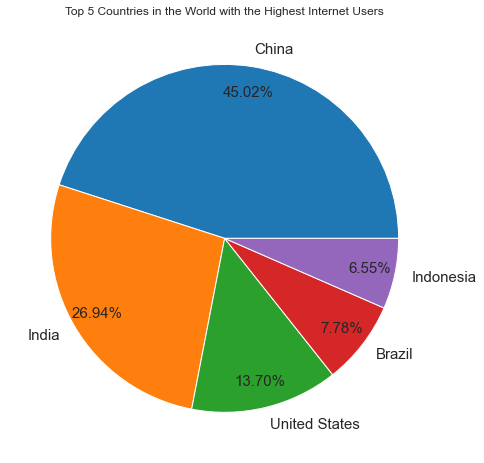

In [42]:
plt.figure(figsize = (15,8))
plt.pie(users_2020['Users'], labels = users_2020['Entity'],autopct='%1.2f%%', pctdistance=0.850, textprops={'fontsize': 15})
plt.title('Top 5 Countries in the World with the Highest Internet Users')
plt.show()

#### The top 5 countries with the highest internet users are China, India, US, Brazil and Indonesia

### Q5: What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [43]:
## Filtering both the Internet and broadband datasets to get only data from the year 2019

broadband_2019 = broadband.loc[broadband['Year'] == 2019]
internet_2019 = internet.loc[internet['Year'] == 2019]

We will be merging the to data sets to determine the correlation. But before that, we will have to make sure that there are no duplicated variables in the unique identifiers (in this case the 'Entity' field) for both the datasets so that we can merge.

In [44]:
# No duplicated values
broadband_2019['Entity'].duplicated().sum()

0

In [45]:
# No duplicated values
internet_2019['Entity'].duplicated().sum()

0

In [46]:
broadband_internet = pd.merge(broadband_2019, internet_2019, left_on = 'Entity', right_on = 'Entity', how = 'inner')
broadband_internet.head()

,Entity,Code_x,Year_x,Broadband_Subscriptions,Code_y,Year_y,Internet_Usage
0,Albania,ALB,2019,15.1407346725,ALB,2019,69.6428546700
1,Austria,AUT,2019,28.1280994415,AUT,2019,87.7522047900
2,Bahrain,BHR,2019,8.5909337997,BHR,2019,99.7015043800
3,Belarus,BLR,2019,34.0111007690,BLR,2019,82.7891520900
4,Belgium,BEL,2019,39.7831382751,BEL,2019,90.3705130900


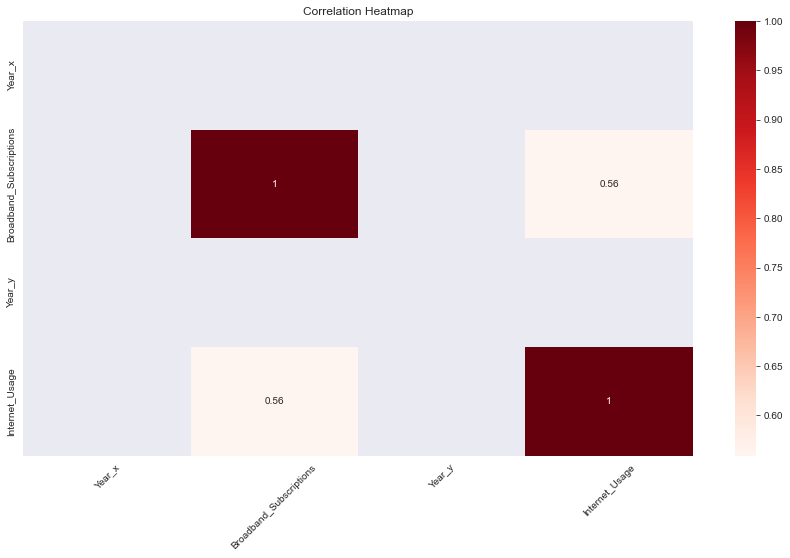

In [47]:
corr = broadband_internet.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = 'Reds', annot = True)
plt.xticks(rotation = 45)
plt.title('Correlation Heatmap')
plt.show()

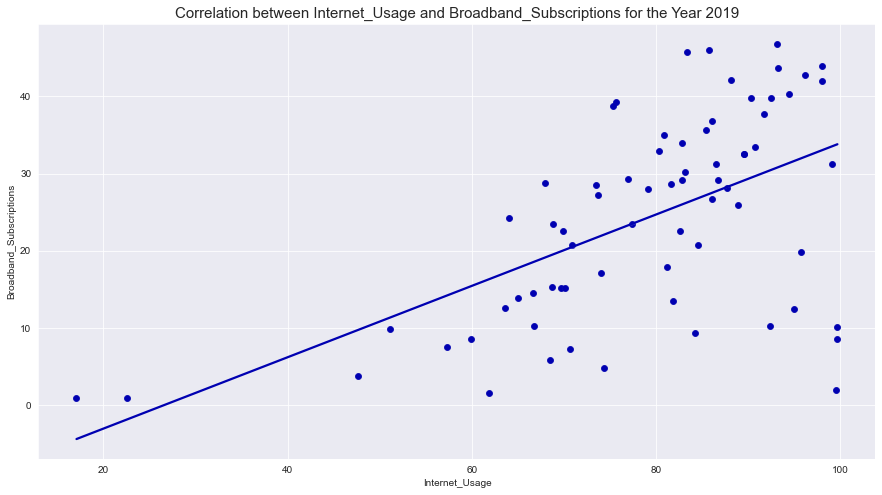

In [48]:
sns.set_palette('seismic')

plt.figure(figsize = (15,8))
sns.scatterplot(x = 'Internet_Usage', y = 'Broadband_Subscriptions', data = broadband_internet)
sns.regplot(x = 'Internet_Usage', y = 'Broadband_Subscriptions', data = broadband_internet, ci = False)
plt.title('Correlation between Internet_Usage and Broadband_Subscriptions for the Year 2019', fontsize = 15)
plt.show()

#### After merging the key datasets (internet and broadband) together. We filter the datasets to obtain only the data for internet usage and broadband subscriptions of different countries for the year 2019. We then plot a scatter plot to determine the correlation between both the variables.

#### A slight positive correlation was observed (0.56) between the two variables, indicating that the increase in internet usage during the year 2019 could be a result of an increased in broadband subscriptions as well in different countries.